In [1]:
# Se importan librerías necesarias
import pandas as pd
import seaborn as sns

Se ingesta el dataset

In [52]:
country = pd.read_csv('country_migration_public.csv', usecols=["base_country_code", "base_country_name", "base_country_wb_income", 
              'base_country_wb_region', "target_country_code", "target_country_name", "target_country_wb_income", 
              "target_country_wb_region", "net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"])

Visualización inicial de la información contenida.

In [53]:
country.head()

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High Income,Middle East & North Africa,af,Afghanistan,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,High Income,Middle East & North Africa,dz,Algeria,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,High Income,Middle East & North Africa,ao,Angola,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,High Income,Middle East & North Africa,ar,Argentina,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,High Income,Middle East & North Africa,am,Armenia,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


Información sobre el tipo de dato en las columnas y cantidad de nulos.

In [54]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_country_wb_income    4148 non-null   object 
 3   base_country_wb_region    4148 non-null   object 
 4   target_country_code       4148 non-null   object 
 5   target_country_name       4148 non-null   object 
 6   target_country_wb_income  4148 non-null   object 
 7   target_country_wb_region  4148 non-null   object 
 8   net_per_10K_2015          4148 non-null   float64
 9   net_per_10K_2016          4148 non-null   float64
 10  net_per_10K_2017          4148 non-null   float64
 11  net_per_10K_2018          4148 non-null   float64
 12  net_per_10K_2019          4148 non-null   float64
dtypes: float64(5), object(8)
memory usage: 421.4+ KB


Se verifica presencia de duplicados.

In [55]:
country.duplicated().sum()

0

Descripción general de las columnas numéricas.

In [56]:
country.describe()

,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,0.461757,0.150248,-0.080272,-0.040591,-0.022743
std,5.006530,4.201118,3.203092,3.593876,3.633247
min,-37.010000,-40.890000,-43.660000,-56.220000,-50.330000
25%,-0.150000,-0.190000,-0.210000,-0.210000,-0.210000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.240000,0.220000,0.160000,0.170000,0.180000
max,150.680000,124.480000,87.000000,91.410000,87.710000


Descripción de  las columnas con strings.

In [57]:
country.describe(include=[object])

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region
count,4148,4148,4148,4148,4148,4148,4148,4148
unique,140,140,4,7,140,140,4,7
top,us,United States,High Income,Europe & Central Asia,us,United States,High Income,Europe & Central Asia
freq,139,139,2415,1696,139,139,2415,1696


In [58]:
country['base_country_name'].nunique()

140

In [59]:
country['target_country_name'].nunique()

140

<AxesSubplot: >

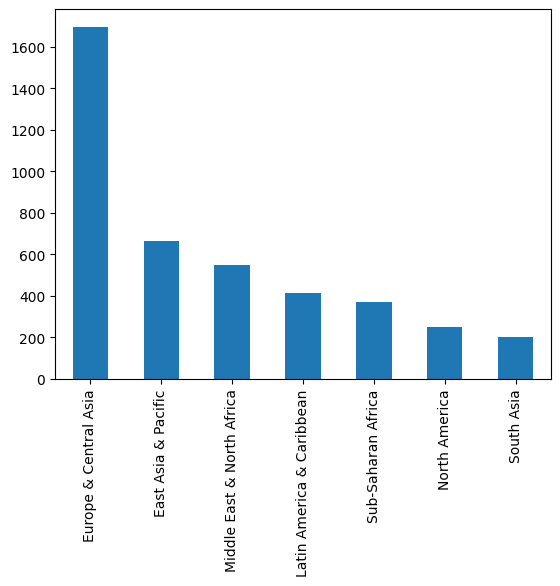

In [60]:
country['base_country_wb_region'].value_counts().plot(kind='bar')

In [61]:
country['target_country_wb_region'].value_counts()

Europe & Central Asia         1696
East Asia & Pacific            665
Middle East & North Africa     550
Latin America & Caribbean      415
Sub-Saharan Africa             369
North America                  252
South Asia                     201
Name: target_country_wb_region, dtype: int64

In [62]:
country[(country['base_country_name'] == 'Argentina') & (country['target_country_name'] == 'Spain')]

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
175,ar,Argentina,High Income,Latin America & Caribbean,es,Spain,High Income,Europe & Central Asia,0.13,-1.8,-2.29,-4.13,-8.1


In [63]:
country[(country['base_country_name'] == 'Spain') & (country['target_country_name'] == 'Argentina')]

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
1289,es,Spain,High Income,Europe & Central Asia,ar,Argentina,High Income,Latin America & Caribbean,-0.08,1.07,1.35,2.43,4.84


<AxesSubplot: >

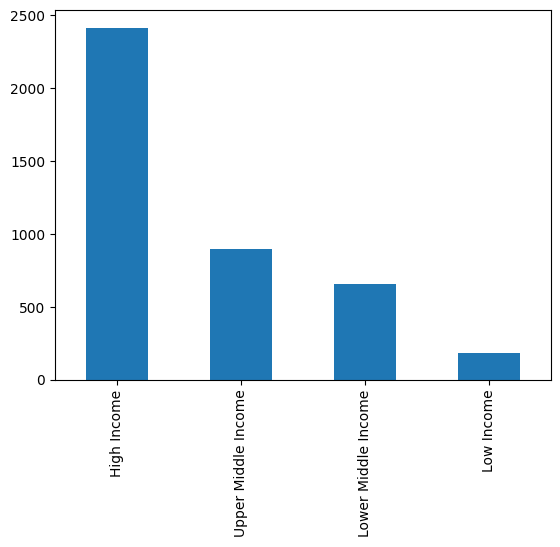

In [64]:
country['base_country_wb_income'].value_counts().plot(kind='bar')

In [140]:
df = pd.melt(frame= country, id_vars=['base_country_wb_income'], value_vars=['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019'])

In [141]:
df.rename(columns={'base_country_wb_income':'Nivel de ingresos', 'variable':'Año', 'value':'Ganancia neta'}, inplace=True)
#df2.replace

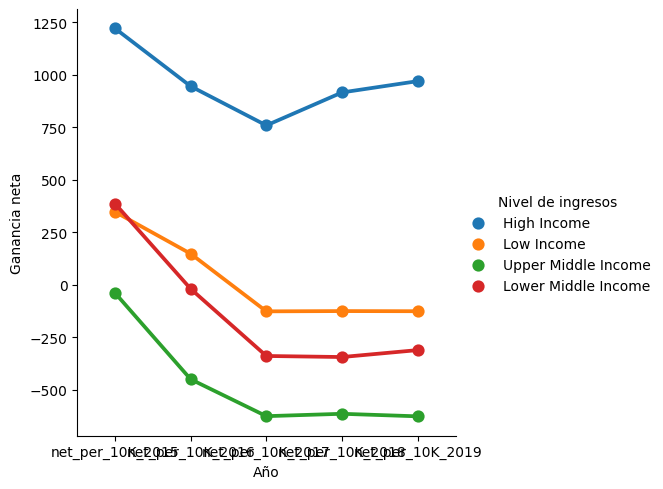

In [198]:
#import numpy as np
sns.catplot(kind='point', data=df, x='Año', y='Ganancia neta', hue= 'Nivel de ingresos', estimator=sum, errorbar=None)

In [144]:
df_region = pd.melt(frame= country, id_vars=['base_country_wb_region'], value_vars=['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019'])

In [146]:
df_region.rename(columns={'base_country_wb_region':'Región', 'variable':'Año', 'value':'Ganancia neta'}, inplace=True)

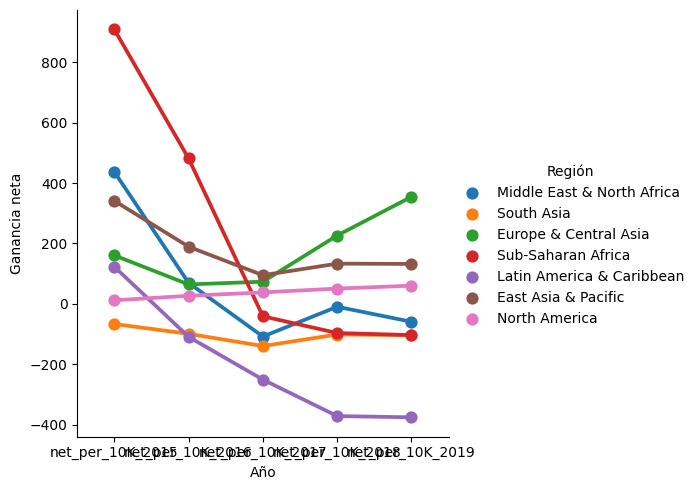

In [147]:
sns.catplot(kind='point', data=df_region, x='Año', y='Ganancia neta', hue='Región', estimator=sum, errorbar=None)

In [186]:
df_usa = country[country['base_country_name'] == 'United States'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5]

In [190]:
df_usa

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
3902,us,United States,High Income,North America,in,India,Lower Middle Income,South Asia,0.65,1.70,1.55,0.81,1.49
3939,us,United States,High Income,North America,ng,Nigeria,Lower Middle Income,Sub-Saharan Africa,-0.70,-0.44,0.06,0.19,0.37
3865,us,United States,High Income,North America,br,Brazil,Upper Middle Income,Latin America & Caribbean,-0.85,-0.51,-0.19,0.01,0.33
3980,us,United States,High Income,North America,ve,"Venezuela, RB",Upper Middle Income,Latin America & Caribbean,0.02,0.18,0.26,0.30,0.30
3947,us,United States,High Income,North America,ph,Philippines,Lower Middle Income,East Asia & Pacific,-0.05,0.07,0.14,0.16,0.26


<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

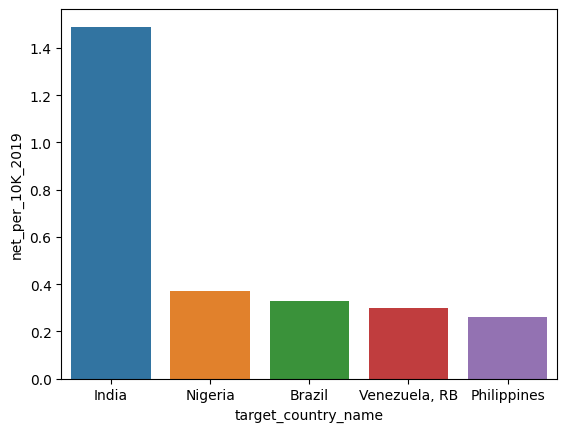

In [199]:
sns.barplot(data=df_usa, y='net_per_10K_2019', x='target_country_name')

In [182]:
df_usa = df_usa.melt(id_vars=['target_country_name'], value_vars=['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019'])

In [183]:
df_usa.rename(columns={'target_country_name':'País', 'variable':'Año', 'value':'Ganancia neta'}, inplace=True)

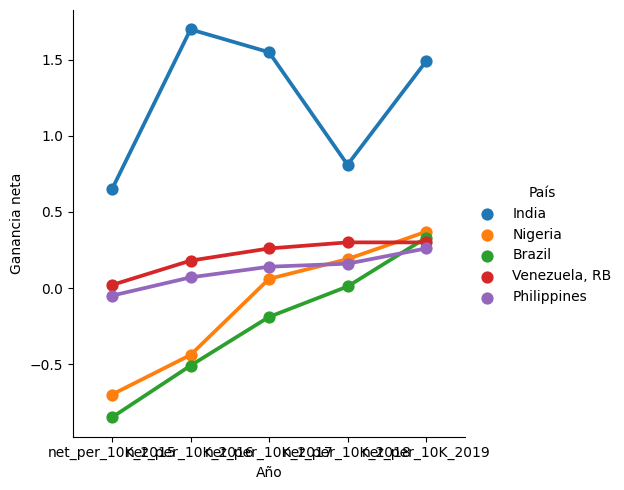

In [185]:
sns.catplot(kind='point', data=df_usa, x='Año', y='Ganancia neta', hue='País', estimator=sum, errorbar=None)

In [217]:
country_filtered = country[(country['base_country_wb_region'] == 'Europe & Central Asia') | 
                           (country['base_country_wb_region'] == 'North America') | 
                           (country['base_country_wb_region'] == 'Latin America & Caribbean')].copy()

In [218]:
country_filt = country_filtered[(country['target_country_wb_region'] == 'Europe & Central Asia') | 
                                (country['target_country_wb_region'] == 'North America') | 
                                (country['target_country_wb_region'] == 'Latin America & Caribbean')].copy()

C:\Users\music\AppData\Local\Temp\ipykernel_25824\2306444266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_filt = country_filtered[(country['target_country_wb_region'] == 'Europe & Central Asia') |


In [233]:
country_filt['base_country_name'].value_counts()

United States     68
United Kingdom    59
Canada            58
France            54
Spain             54
                  ..
Puerto Rico        4
Jamaica            4
Uzbekistan         4
Haiti              4
Bahamas, The       3
Name: base_country_name, Length: 69, dtype: int64

In [221]:
country_filt[country_filt['base_country_name'] == 'United States'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5]

,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
3865,us,United States,High Income,North America,br,Brazil,Upper Middle Income,Latin America & Caribbean,-0.85,-0.51,-0.19,0.01,0.33
3980,us,United States,High Income,North America,ve,"Venezuela, RB",Upper Middle Income,Latin America & Caribbean,0.02,0.18,0.26,0.30,0.30
3928,us,United States,High Income,North America,mx,Mexico,Upper Middle Income,Latin America & Caribbean,-0.03,0.09,0.09,0.13,0.25
3973,us,United States,High Income,North America,tr,Turkey,Upper Middle Income,Europe & Central Asia,-0.10,0.03,0.12,0.09,0.11
3975,us,United States,High Income,North America,ua,Ukraine,Lower Middle Income,Europe & Central Asia,0.04,0.06,0.11,0.19,0.10


<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

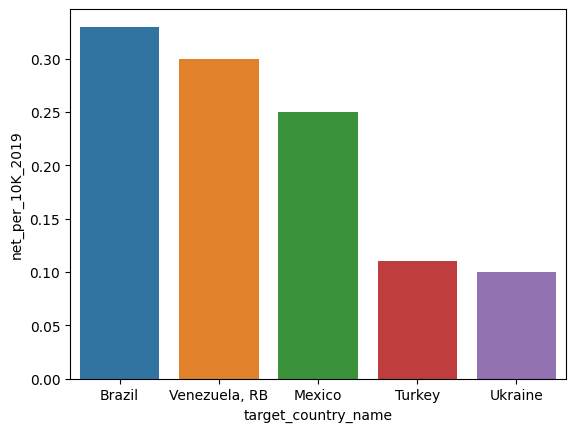

In [226]:
sns.barplot(data=country_filt[country_filt['base_country_name'] == 'United States'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5], x='target_country_name', y='net_per_10K_2019')

<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

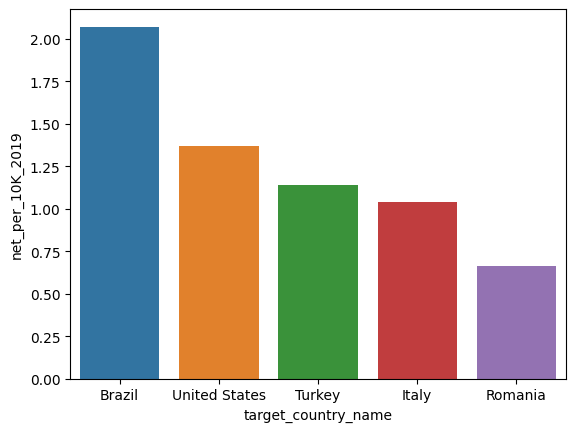

In [227]:
sns.barplot(data= country_filt[country_filt['base_country_name'] == 'United Kingdom'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5], x='target_country_name', y='net_per_10K_2019')

<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

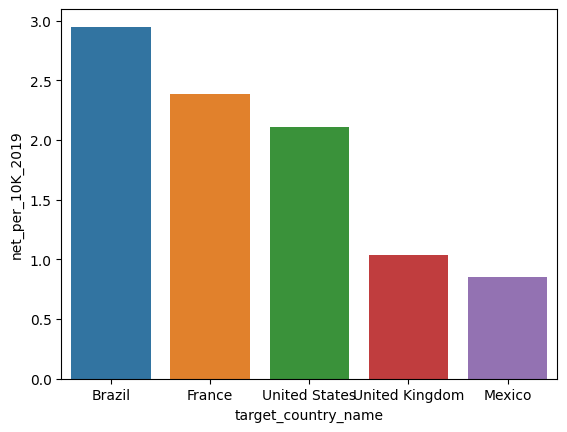

In [234]:
sns.barplot(data= country_filt[country_filt['base_country_name'] == 'Canada'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5], x='target_country_name', y='net_per_10K_2019')

<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

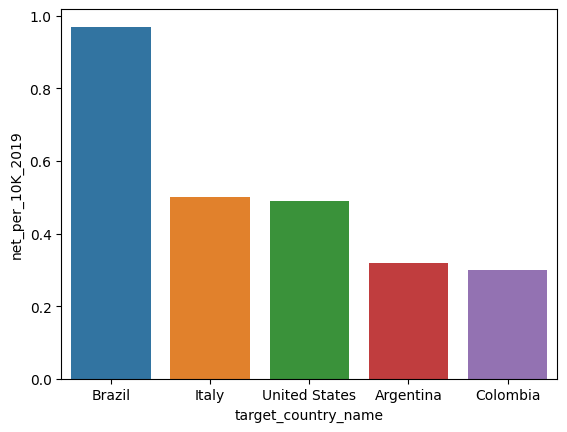

In [235]:
sns.barplot(data= country_filt[country_filt['base_country_name'] == 'France'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5], x='target_country_name', y='net_per_10K_2019')

<AxesSubplot: xlabel='target_country_name', ylabel='net_per_10K_2019'>

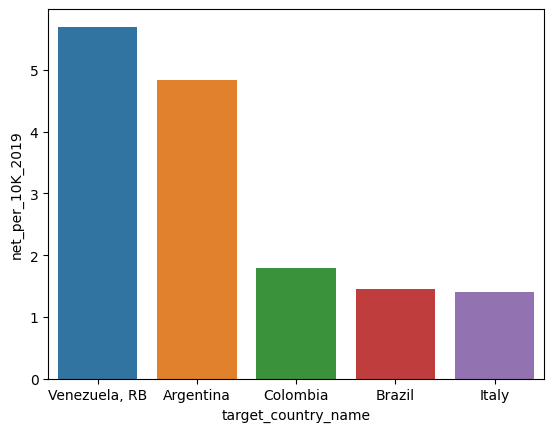

In [236]:
sns.barplot(data= country_filt[country_filt['base_country_name'] == 'Spain'].sort_values(by='net_per_10K_2019', ascending=False).iloc[:5], x='target_country_name', y='net_per_10K_2019')